## 4.2 필기체를 분류하는 CNN 구현 
2장, 3장에서 다룬 필기체 데이터를 CNN으로 분류합니다.

### 4.2.1 분류 CNN 모델링 
1. 합성곱 계층들과 완전 연결 계층들이 결합하여 구성된 분류 CNN을 모델링하는 방법을 알아보겠습니다.

- 모델링에 필요한 케라스 패키지들을 불러오는 것이 우선입니다.

In [5]:
import keras
from keras import models, layers
from keras import backend

- CNN 객체를 models.Sequential로 상속하여 연쇄 방식으로 모델을 구현합니다.

In [6]:
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
                      metrics=['accuracy'])

### 4.2.3 분류 CNN을 위한 데이터 준비  
2. 분류 CNN에 사용할 데이터인 앞선 장들에 나왔던 MNIST이고 이에 대한 CNN을 위한 사전처리를 진행합니다. 

In [13]:
#from keras import datasets 
from tensorflow.keras import datasets # colab, py27, keras28
from tensorflow.keras import utils # colab, py27, keras28

class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        #y_train = keras.utils.to_categorical(y_train, num_classes)
        #y_test = keras.utils.to_categorical(y_test, num_classes)
        y_train = utils.to_categorical(y_train, num_classes)
        y_test = utils.to_categorical(y_test, num_classes)
        

        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test  

### 4.2.3 학습 효과 분석
3. 학습 효과를 분석하기 위해 그래프를 그리는 기능을 임포트합니다. 

In [14]:
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt

### 4.2.4 분류 CNN 학습 및 성능 평가
4. 데이터와 모델이 준비되었으니 이제 이들을 이용해 학습과 성능 평가를 진행할 차례입니다. 

Epoch 1/10
375/375 [==============================] - 14s 10ms/step - loss: 0.2535 - accuracy: 0.9229 - val_loss: 0.0694 - val_accuracy: 0.9796
Epoch 2/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0912 - accuracy: 0.9733 - val_loss: 0.0512 - val_accuracy: 0.9847
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0680 - accuracy: 0.9801 - val_loss: 0.0445 - val_accuracy: 0.9874
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0544 - accuracy: 0.9840 - val_loss: 0.0402 - val_accuracy: 0.9887
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0470 - accuracy: 0.9860 - val_loss: 0.0455 - val_accuracy: 0.9862
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0439 - accuracy: 0.9872 - val_loss: 0.0389 - val_accuracy: 0.9884
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0362 - val_accuracy: 0.9896
Ep

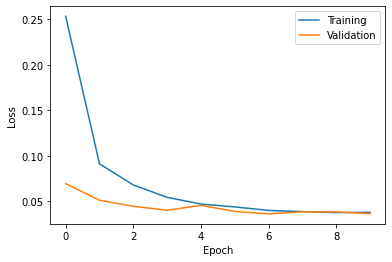

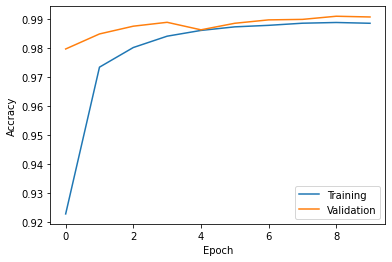

In [15]:
batch_size = 128
epochs = 10

data = DATA()
model = CNN(data.input_shape, data.num_classes)

history = model.fit(data.x_train, data.y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

score = model.evaluate(data.x_test, data.y_test)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

---
### 4.2.4 전체 코드

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2530 - accuracy: 0.9226 - val_loss: 0.0657 - val_accuracy: 0.9803
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0884 - accuracy: 0.9738 - val_loss: 0.0494 - val_accuracy: 0.9854
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0661 - accuracy: 0.9806 - val_loss: 0.0448 - val_accuracy: 0.9866
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.0476 - val_accuracy: 0.9861
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0495 - accuracy: 0.9854 - val_loss: 0.0469 - val_accuracy: 0.9870
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0455 - accuracy: 0.9869 - val_loss: 0.0462 - val_accuracy: 0.9878
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0443 - accuracy: 0.9871 - val_loss: 0.0516 - val_accuracy: 0.9881

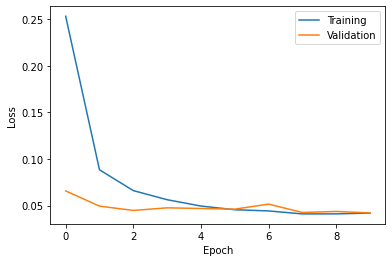

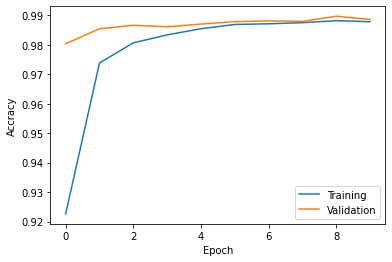

In [16]:
# File: ex4_1_cnn_mnist_cl.py

# 1. 분류 CNN 모델링
import keras
from keras import models, layers
from keras import backend

class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
                      metrics=['accuracy'])

# 2. 분류 CNN을 위한 데이터 준비  
#from keras import datasets 
from tensorflow.keras import datasets # colab, py27, keras28 
from tensorflow.keras import utils # colab, py27, keras28

class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = utils.to_categorical(y_train, num_classes)
        y_test = utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test        
        
# 3. 학습 효과 분석
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt

# 4. 분류 CNN 학습 및 테스트
def main():
    batch_size = 128
    epochs = 10

    data = DATA()
    model = CNN(data.input_shape, data.num_classes)

    history = model.fit(data.x_train, data.y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.2)

    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()

main()